# COGS 108 - Final Project 

# Overview

As society continues to progress and become dependant on social platforms for more informative resources, we can look at the relations between social popularity and health scores on these public domains, as well as any confounding variables to try and find trends related to the food industry. By exploring data visualizations to see trends, we can take this a step further with hypothesis testing to verify if such trends are actually happening. Although my prior inclinations about social popularity's relation to health scores were false, I was able to look at confounding variables like the number of critical violations a restaurant makes, and use this to bring about more information for society to consider. With this knowledge it can influence how we decide to go about choosing food facilities to dine at.

# Name & GitHub

- Name: Kasie Gomez
- GitHub Username: kasiegomez

# Research Question

### Topic: Health Inspections
Is a decrease in social popularity an indicator that a food facility will also decline in their health scores? Social popularity will be based at large using ratings from the application 'Yelp'. Also, are there other variables that affect health scores that we, as consumers, should be worried about?

## Background and Prior Work

With the rise of social platforms in present day society, it is interesting to see the evolving resources we, as consumers, are allowed to see when it comes to the food industry. A major platform that has become an essential influencer for the kinds of food facilities we are encouraged to visit is the application 'Yelp'. From previous research, I found that an important note was made from an article by INFORMS where they clarified that a social media platform like 'Yelp' can have a consistency affect between a restaurant's health score and their social popularity. This article referenced a past study which found that a customer's review can be an indicator for good hygiene protocols at a restaurant. Another finding from a 'Yelp' blog post also highlighted that implementing changes on their interface to include health scores was a major adjustment made to increase the amount of data available for the consumer. Having such public information has caused for changes in consumerism, as another study conducted on digital disclosures and their relations to health scores, referenced in the 'Yelp' blog post, have found that posting health scores on 'Yelp' has led to a 12% decrease in consumerism for restaurants with poor health scores.

Understanding such influences that a social platform can have on which food facility will have an increase or decrease in consumers, based on their health scores, was an interesting observation to learn about. And so, I wanted to look deeper into the kinds of datasets made available to the public and recognize if there were any trends that can be linked between a food facility's ratings and their health score. As well as how this can be generalized to a society, in order to spot trends that may be potential concerns or may give us more information for how we can look at the overall ranking of food facilities among different cities. I realize that by posting health scores on a public domain, it has already started to have a desired affect on how a food facility's rating can be a precaution for how they practice hygiene. And thus, it sparked my leading topic of discussion on how we can pinpoint if by having public knowledge about a food facility's social popularity, can it influence their health scores? As well as looking further into an analysis that will factor in other potential variables, in order to find any indicators that consumers can look out for. Because our society values public resources and informations that impact our food health and safety, it will be interesting to see variables or components of public information that can also be influencing a food facility's status.

References (include links):
- 1) INFORMS Article: https://www.eurekalert.org/pub_releases/2020-01/ifor-cra011320.php
- 2) Yelp blog post: https://blog.yelp.com/2018/07/lives-national
- 3) Study on disclosure and health scores: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3131900

# Hypothesis


My main hypothesis is that because of the major impact social media has on present day society, an application like 'Yelp' will also have an impact on the health scores for food facilities in North Carolina, being that a facility's ratings and reviews online can be an indicator for how much they practice good hygiene. I have a leading predication that the majority of food facilities with higher 'Yelp' ratings will indicate that those places have higher health scores in their inspection report, and those with poorer ratings will have poorer health scores.

# Dataset(s)

### Inspections
- Dataset Name: inspections.csv
- Link to the dataset: inspections.csv
- Number of observations: 18466

In this dataset we have access to a food facility's name, address, phone number, and when the establishment opened. We also have a highly specific outline from the inspection report such as a description from the day of the inspection, the facility's health score, the number of critical and noncritical violations found, as well as any prior inspection reports.

### Yelp Reviews
- Dataset Name: yelp.csv
- Link to the dataset: yelp.csv
- Number of observations: 3688

From the 'Yelp' dataset, we have access to a food facility's name, address, phone number, price range, rating, the number of reviews they have, as well as which food categories they cater in their establishment.

I plan to combine these two datasets based on the zip codes and cities provided. Being that in order to find a direct link between a facility's name and address between both datasets was ambiguous, I decided to generalize the ratings from the 'Yelp' dataset in order to get a brief overall outlook from the average ratings that are connected to a certain zip code and thus create a combined dataframe with the 'Inspections' dataset.

# Setup

In [1]:
# Import packages needed for this project
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

### Load the Data
Create a dataframe for each respective dataset.

In [2]:
# Inspections dataset
inspections = pd.read_csv('inspections.csv')

# Yelp Reviews dataset
yelp = pd.read_csv('yelp.csv')

### Clean the Data
Remove any non-applicable columns that will not be needed for further analysis.

In [3]:
# Drop non-applicable columns from the Yelp and Inspections dataframe (df)
yelp = yelp[['rating', 'zip_code']]
inspections = inspections[['name', 'city', 'state', 'postalcode', 'facilitytype', 'type', 'description', 'inspection_num', 'score', 'num_critical', 'num_non_critical']]


Because some rows in the 'Inspections' dataframe have an extension to their postalcodes we can minimize this by focusing on the main 5-digit zip codes. Also rename the column so it can be merged later on with the 'Yelp' dataframe.

In [4]:
# Keep the first 5-digits of the zip code
inspections = inspections.assign(postalcode=inspections['postalcode'].str[:5])
# Rename the column to 'zip_code'
inspections = inspections.rename({'postalcode': 'zip_code'}, axis='columns')

I also want to make sure the dtype of each dataframe is similar, especially to the 'zip_code' column in order to merge them.

In [5]:
inspections.dtypes

name                 object
city                 object
state                object
zip_code             object
facilitytype         object
type                 object
description          object
inspection_num        int64
score               float64
num_critical          int64
num_non_critical      int64
dtype: object

In [6]:
yelp.dtypes

rating      float64
zip_code      int64
dtype: object

In [7]:
# Since the 'zip_code' columns for both df are not of similar types I will adjust this
yelp['zip_code'] = yelp['zip_code'].astype(str)

### The data thus far

In [8]:
inspections.head()

,name,city,state,zip_code,facilitytype,type,description,inspection_num,score,num_critical,num_non_critical
0,Cafe 3000 At Wake Med,raleigh,NC,27610,Restaurant,Inspection,This facility cooks eggs to order in Grill sta...,1,96.0,9,7
1,Overtime Sports Pub,raleigh,NC,27610,Restaurant,Inspection,NaN,1,98.0,0,11
2,TASTE OF CHINA,raleigh,NC,27610,Restaurant,Inspection,NaN,1,97.0,4,8
3,Panera Bread #1643,cary,NC,27513,Restaurant,Inspection,NaN,1,99.0,2,3
4,WalMart Supercenter #4499-00 Deli/Bakery,zebulon,NC,27597,Food Stand,Inspection,"New rules, www.wakegov.com/food",1,97.0,2,4


In [9]:
yelp.head()

,rating,zip_code
0,2.5,27560
1,4.0,27519
2,5.0,27612
3,3.0,27893
4,3.5,27896


### Looking deeper into the Dataframes
Since there is ambiguity between whether we can apply 'Yelp' ratings of a food facility to their exact health inspection report, I decided to look at the similarity between the zip codes and their respective city. This way we can generalize ratings found among certain cities and use them for further analysis.

#### Finding the average ratings and health scores
As part of the generalization process, here I will create two new dataframes by escavating the average ratings for a zip code based on the 'Yelp' dataframe, and the average health scores for a city based on the 'Inspections' dataframe.

In [10]:
# Average ratings for a zip code based on 'Yelp'
avg_rate_byzip = yelp.groupby('zip_code')['rating'].mean()
avg_rating_byzip = pd.DataFrame(avg_rate_byzip) # New dataframe

avg_rating_byzip = avg_rating_byzip.rename({'rating': 'avg_rating'}, axis='columns')
avg_rating_byzip.head() # Take a look at the dataframe

,avg_rating
zip_code,
15035,1.00
22701,4.00
27023,3.75
27041,4.50
27203,4.00


In [11]:
# Average health scores for a city based on 'Inspections'
avg_healthscore = inspections.groupby('city')['score'].mean()
avg_healthscore_bycity = pd.DataFrame(avg_healthscore) # New dataframe

avg_healthscore_bycity = avg_healthscore_bycity.rename({'score': 'avg_healthscore'}, axis='columns')
avg_healthscore_bycity.head() # Take a look at the dataframe

,avg_healthscore
city,
angier,94.750000
apex,96.305868
cary,96.353045
clayton,97.111111
creedmoor,98.250000


### Merge the Dataframes
In order to merge the dataframes as clean as possible I will merge the 'avg_rating_byzip' dataframe on the column 'zip_code', and then merge the 'avg_healthscore_bycity' dataframe on the column 'city'. And finally, apply this combined data into a new dataframe that will be our main dataframe to work with.

In [12]:
inspections = pd.merge(inspections, avg_rating_byzip, on='zip_code')
inspections = pd.merge(inspections, avg_healthscore_bycity, on='city')

# This will be our main df for all combined data
df = inspections
df.head() # Take a look at the new df

,name,city,state,zip_code,facilitytype,type,description,inspection_num,score,num_critical,num_non_critical,avg_rating,avg_healthscore
0,Cafe 3000 At Wake Med,raleigh,NC,27610,Restaurant,Inspection,This facility cooks eggs to order in Grill sta...,1,96.0,9,7,3.283582,96.252911
1,Overtime Sports Pub,raleigh,NC,27610,Restaurant,Inspection,NaN,1,98.0,0,11,3.283582,96.252911
2,TASTE OF CHINA,raleigh,NC,27610,Restaurant,Inspection,NaN,1,97.0,4,8,3.283582,96.252911
3,Cariokos,raleigh,NC,27610,Restaurant,Inspection,Note : The rice cooker may not be NSF approved.,1,97.0,4,10,3.283582,96.252911
4,Food Lion #586 Meat Market,raleigh,NC,27610,Meat Market,Inspection,NaN,1,96.0,4,5,3.283582,96.252911


With this dataframe, I have enough variables to work with in order to start exploring the data and testing my hypothesis.

# Data Analysis & Results

### Exploratory Data Analysis (EDA)
In order to get a better perspective on the routes I can take to explore the data, I looked into the variables I have obtained and created data visualizations to get a better understanding of the variables and how they can correlate with other major variables, like average ratings or average health scores. I first wanted to look deeper into where the majority of the main data is coming from based on the cities, and thus formulated a barplot to best see the data count.

Text(0, 0.5, 'City')

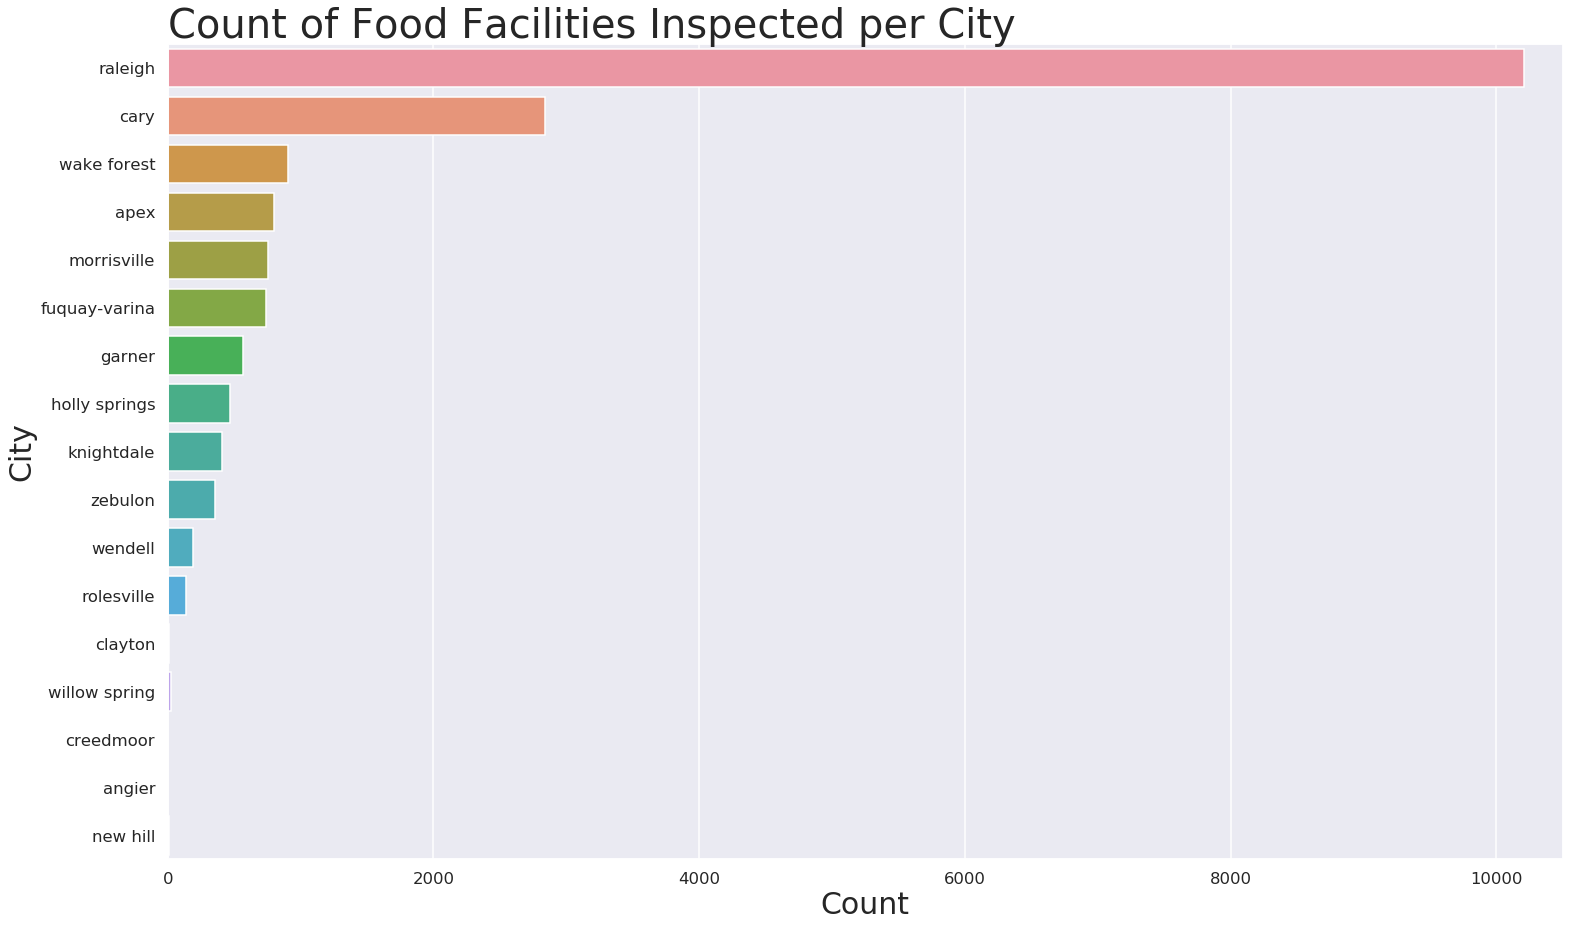

In [13]:
plt.figure(figsize=(25,15))
plt.xlim(0, 10500)
city_count = sns.countplot(y='city', data=df, order=['raleigh', 'cary', 'wake forest', 'apex',
                                                    'morrisville', 'fuquay-varina', 'garner',
                                                    'holly springs', 'knightdale',
                                                    'zebulon', 'wendell', 'rolesville', 
                                                    'clayton', 'willow spring', 'creedmoor',
                                                    'angier', 'new hill'])
city_count.set_title('Count of Food Facilities Inspected per City', loc='left', fontsize=40)
city_count.set_xlabel('Count', fontsize=30)
city_count.set_ylabel('City', fontsize=30)

When doing research, I found that 'Raleigh' is the capital city of North Carolina, therefore we can see how this plays out with having a bigger population of food facilities around this city. The city of 'Cary' also follows in the higher ranks as it is also one of the most populated cities of North Carolina.

With this in mind I moved on to looking at the relations between cities and their average health scores and the average restaurant ratings found in those cities. Being that these are categorical and quantitative data, I used barplots to best see how the data is distributed.

### Exploratory Data Vizualization

Text(0, 0.5, 'City')

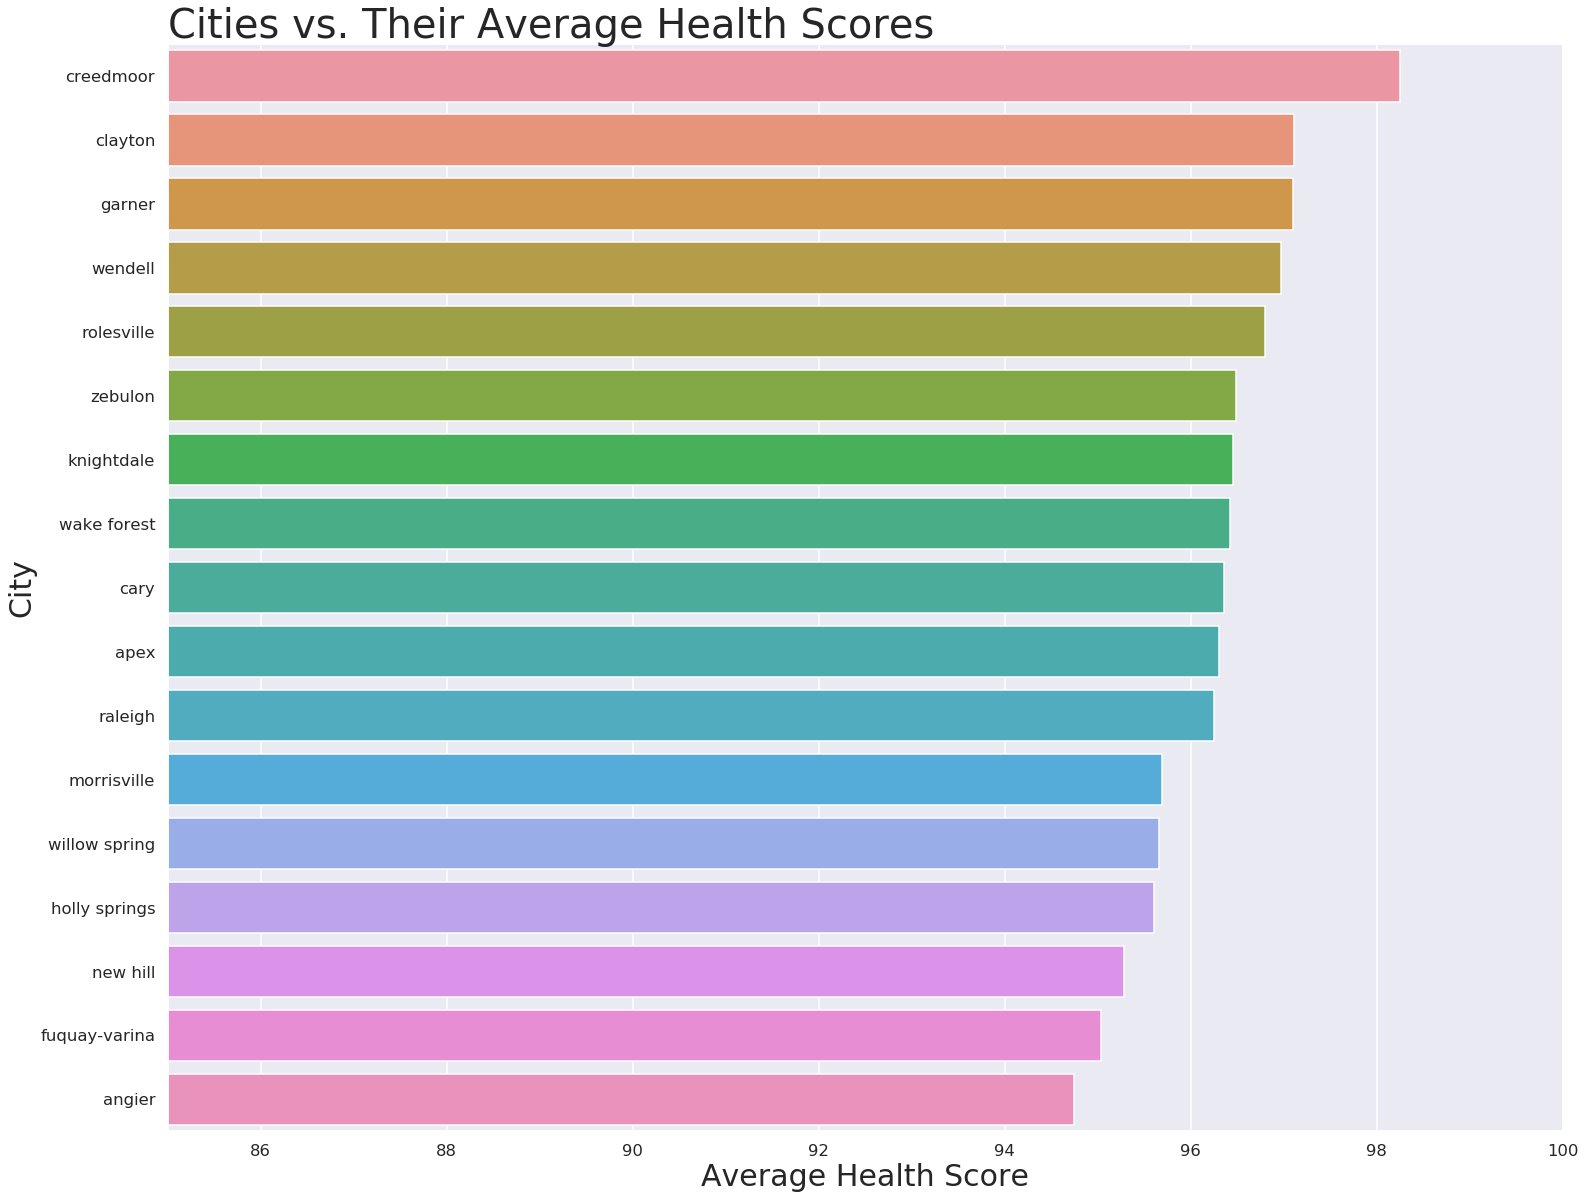

In [14]:
plt.figure(figsize=(25,20))
plt.xlim(85, 100)
city_healthscore = df.sort_values(by = 'avg_healthscore', ascending=False)
fig1 = sns.barplot(x="avg_healthscore", y='city', data=city_healthscore)
fig1.set_title('Cities vs. Their Average Health Scores', loc='left', fontsize=40)
fig1.set_xlabel('Average Health Score', fontsize=30)
fig1.set_ylabel('City', fontsize=30)

Text(0, 0.5, 'City')

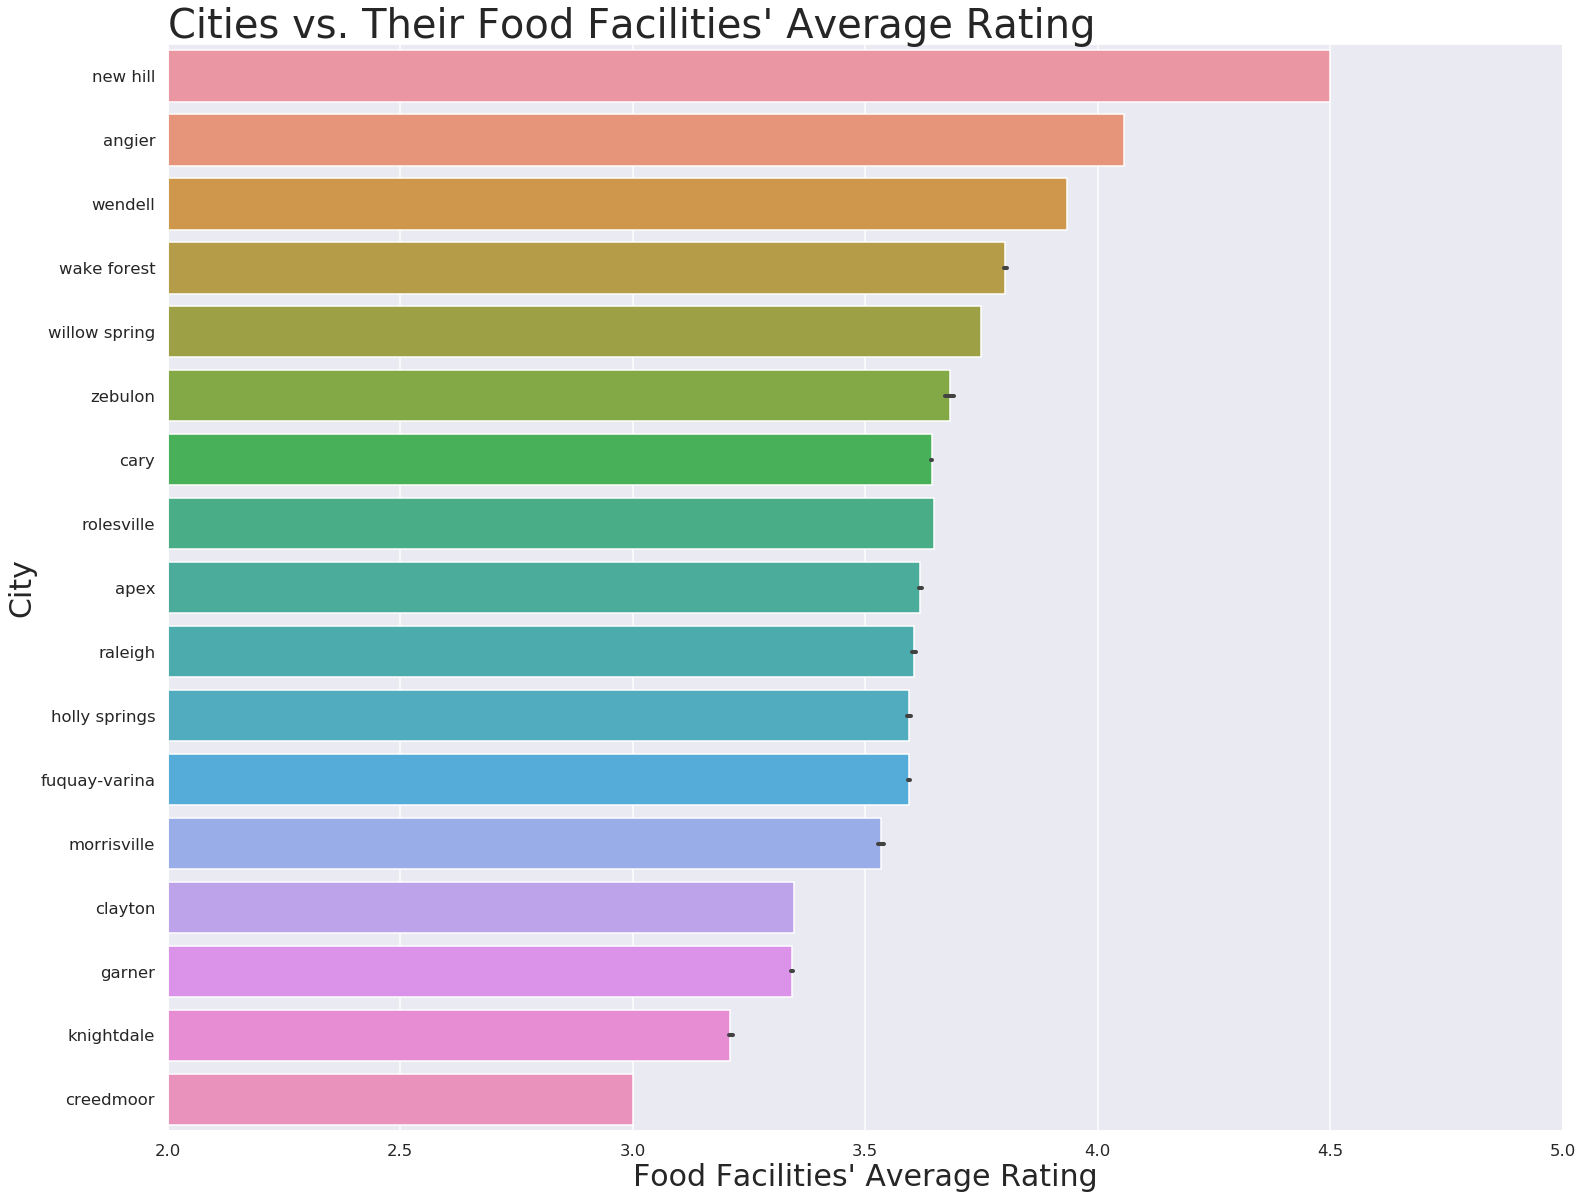

In [15]:
plt.figure(figsize=(25,20))
plt.xlim(2, 5)
city_rating = df.sort_values(by = 'avg_rating', ascending=False)
fig2 = sns.barplot(x="avg_rating", y='city', data=city_rating, 
            order=['new hill', 'angier', 'wendell', 'wake forest', 'willow spring', 'zebulon', 
                  'cary', 'rolesville', 'apex', 'raleigh', 'holly springs', 'fuquay-varina', 
                   'morrisville', 'clayton', 'garner', 'knightdale', 'creedmoor'])
fig2.set_title('Cities vs. Their Food Facilities\' Average Rating', loc='left', fontsize=40)
fig2.set_xlabel('Food Facilities\' Average Rating', fontsize=30)
fig2.set_ylabel('City', fontsize=30)

### Analysis using Linear Regression
Being that my main focus is to see if there is a relationship between 'Yelp' ratings and health scores, I will use linear regression with Statsmodels & Patsy. Linear regression will help to create a model that pinpoints how a predictor variable can be influenced from another variable, and thus I can interpret if there is a strong or weak linear relationship between my hypothesis variables.

### Hypothesis Test for Average Health Scores and their Average Restaurant Ratings

In [16]:
# Linear model with average health score & average rating
outcome_1, predictors_1 = patsy.dmatrices('avg_healthscore ~ avg_rating', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        avg_healthscore   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.59
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           4.66e-05
Time:                        21:11:54   Log-Likelihood:                -6641.7
No. Observations:               18431   AIC:                         1.329e+04
Df Residuals:                   18429   BIC:                         1.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.4295      0.048   2020.151      0.0

<b>Null Hypothesis:</b> There is a significant difference among average health scores and their respective average ratings.

<b>Alternative Hypothesis:</b> There is no significant difference among average health scores and their respective average ratings.

Based on this model and using a common alpha value of 0.01 for significance, I recognize that the P>|t| is less than the alpha value, therefore we reject the null hypothesis and can conclude that there is no significant difference, thus there are no direct correlations between a city's average health scores and their average food facility ratings.

Being that my purpose is to find a trend that can have a link on how the health scores are influenced, I decided to do a hypothesis for another variable. This time I will fit a model for a city and their health scores, however rather than looking at the average health scores I decided to pull directly from the raw health scores tallied for each food facility in a city, since we have this information available.

### Hypothesis Test for Cities and their Health Scores

In [17]:
# Linear model with cities & their health scores
outcome_2, predictors_2 = patsy.dmatrices('score ~ city', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
# Print out the summary results of the model fitting
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     20.05
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           4.35e-58
Time:                        21:11:56   Log-Likelihood:                -43985.
No. Observations:               18431   AIC:                         8.800e+04
Df Residuals:                   18414   BIC:                         8.814e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                94.75

<b>Null Hypothesis:</b> There is a significant difference between health scores for each city.

<b>Alternative Hypothesis:</b> There is no significant difference between health scores for each city.

Using alpha value at 0.01 and taking a look at the p-value (P>|t|) for each city found in the main dataframe, we can see that the p-values are greater than the alpha value, therefore we fail to reject the null hypothesis and can conclude that there is a signifant difference between health scores for each city.

Going further I wanted to validate what I found in the 'Exploratory Data Visualization' section, and I decided to run another hypothesis test to verify if cities have direct links to their average ratings.

### Hypothesis Test for Cities and their Average Restaurant Ratings

In [18]:
# Linear model with cities & their average rating
outcome_3, predictors_3 = patsy.dmatrices('avg_rating ~ city', df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
# Print out the summary results of the model fitting
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     403.1
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:11:58   Log-Likelihood:                 6900.5
No. Observations:               18431   AIC:                        -1.377e+04
Df Residuals:                   18414   BIC:                        -1.363e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.05

<b>Null Hypothesis:</b> There is a significant difference between the average food facility ratings of each city.

<b>Alternative Hypothesis:</b> There is no significant difference between the average food facility ratings of each city.

With an alpha value of 0.01, we can see that every city's p-value is less than the alpha value except for the city of Wendell. For every other city we reject the null hypothesis and can say that there is no significant difference between the average food facilty ratings for each city. However, for the city of Wendell we fail to reject the null hypothesis and can find that there is a significant difference between the average food facilty ratings in this city. Although, when looking back at the data visualization generated for 'Cities vs. Their Food Facilities' Average Ratings', it can be noted that the city of Wendell ranks above average amongst the other cities, and so seeing that it has a significant difference between their average ratings can go to show how most food facilities rank in this city, and that they are most likely to remain in their ranks because there is consistancy with their average ratings. Also, briefly checking the data visualization for 'Cities vs. Their Average Health Scores', we can see that the city of Wendell remains fairly high in ranks, thus showing another form of consistency among the food facilities found in this city with high ranks and good health scores. Thus, leading a possibility that the city of Wendell is a good spot to consider dining at.

##### Another Perspective: Does the number of critical violations have a direct link to how good or bad a food facility is? 
Although no direct links can be found thus far between what is affecting the health scores, we can look further into the scope of health inspections and if we should be worried that food facilities with higher critical violations should be on the consumer's radar. With a general perspective, we are more prone to believe that places with more critical violations would result in that area of food facilities to have a lower rating. I generated a scatterplot to pinpoint every facility's number of critical violations alongside the average rating for their respective city.

Text(0, 0.5, 'Number of Critical Violations')

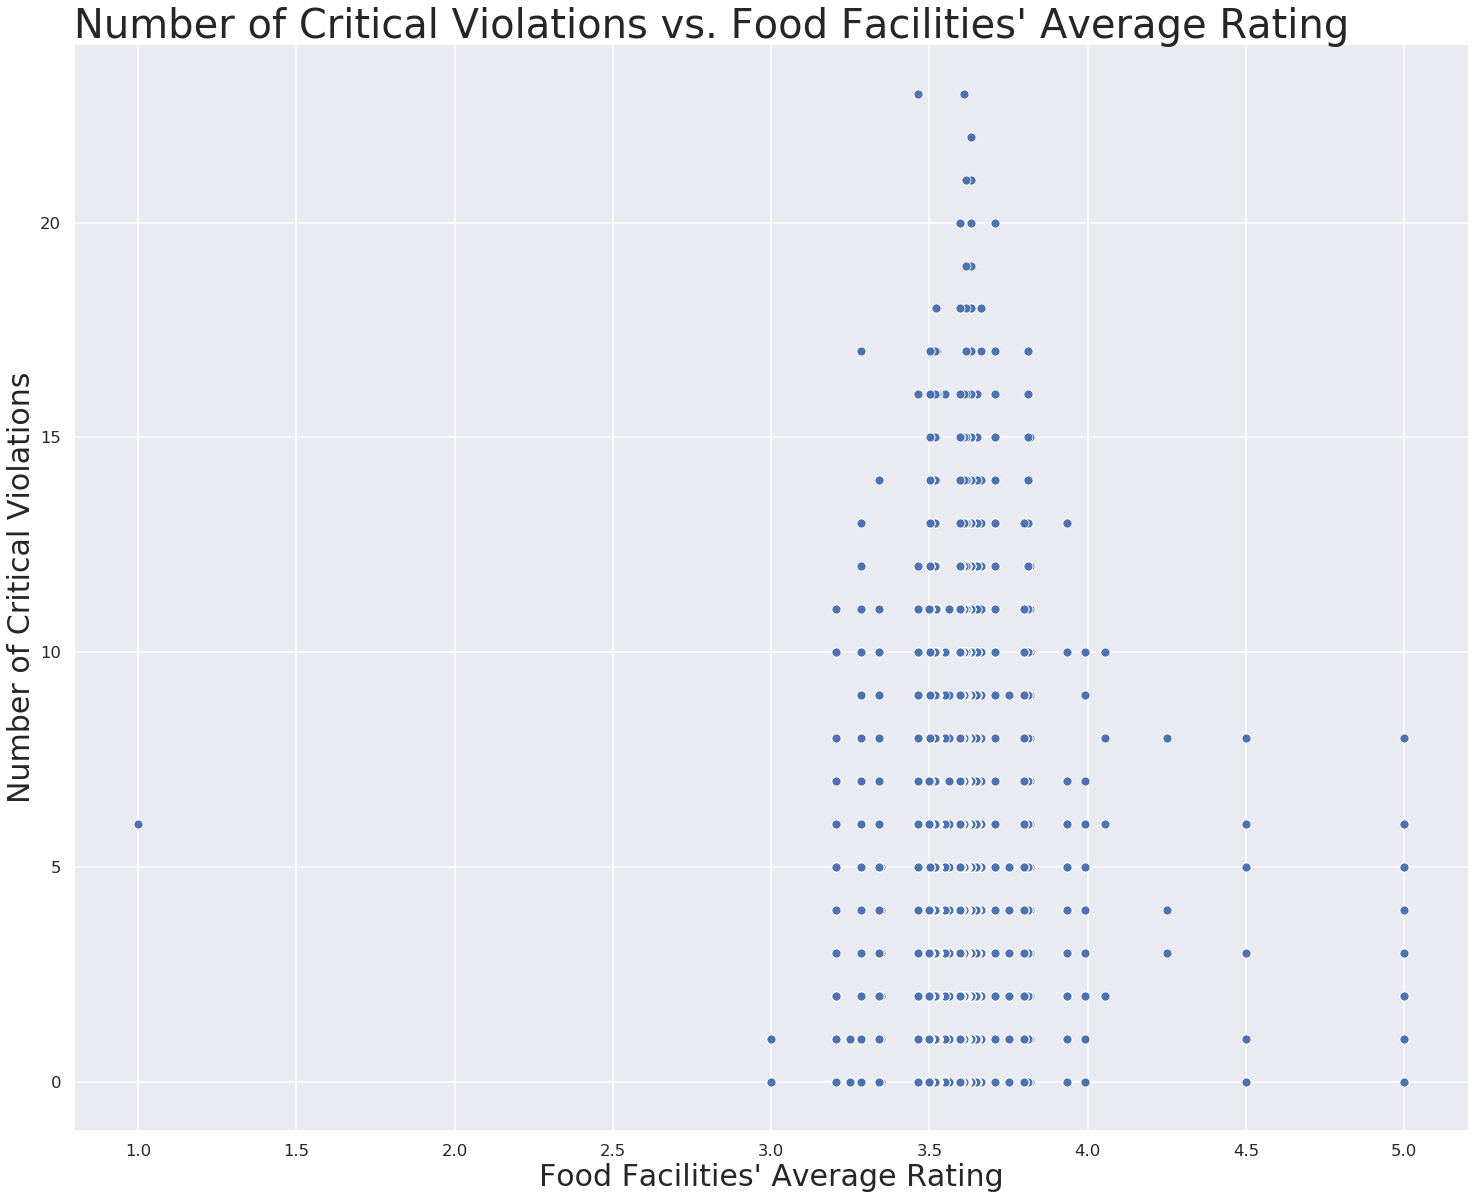

In [19]:
plt.figure(figsize=(25,20))
crit_rate = df.sort_values(by = 'avg_rating', ascending=False)
fig3 = sns.scatterplot(x="avg_rating", y='num_critical', data=crit_rate)
fig3.set_title('Number of Critical Violations vs. Food Facilities\' Average Rating', loc='left', fontsize=40)
fig3.set_xlabel('Food Facilities\' Average Rating', fontsize=30)
fig3.set_ylabel('Number of Critical Violations', fontsize=30)

There appears to be a normal distribution with a central peak at a rating around 3.5 with  more than 20 critical violations. However, when the distribution tails off at the right side of the scatterplot it can be noted how food facilites with a rating between 4.5 - 5 have a critical violation count of less than 10. Showing that, having double the amount of critical violations can be an indicator that the facility may have about an average rating on 'Yelp', but facilities with a high rating of almost 5 will have less than double the amount of critical violations.

### Hypothesis Test for a Food Facility's Number of Critical Violations and their Average Rating

In [20]:
# Linear model with the number of criticial violations & average rating
outcome_4, predictors_4 = patsy.dmatrices('num_critical ~ avg_rating', df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
# Print out the summary results of the model fitting
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:           num_critical   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.761
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.185
Time:                        21:12:01   Log-Likelihood:                -45179.
No. Observations:               18431   AIC:                         9.036e+04
Df Residuals:                   18429   BIC:                         9.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3533      0.386      8.681      0.0

<b>Null Hypothesis:</b> There is a significant difference between the number of critical violations and where a food facility ranks in ratings.

<b>Alternative Hypothesis:</b> There is no significant difference between the number of critical violations and where a food facility ranks in ratings.

Using an alpha value of 0.01, our p-value for this hypothesis test is far greater than our alpha value, therefore we fail to reject the null hypothesis and can confirm that there is a significant difference between the number of critical violations committed and where the food facility ranks in their rating. Thus, this hypothesis test confirms my suspicion made from the previous data visualization (scatterplot).

# Ethics & Privacy

With the provided datasets, there are very little ethical concerns about using these data for analysis being that they are public resources. In terms of the way I conducted my analysis and how I wanted to go about utilizing the data, I decided to generalize my topic. Meaning that because it was slightly ambiguous to connect datasets in order to pinpoint specific food facilities and their many health inspection information, ratings, population logistics, etc., this could also raise a concern for privacy matter because I was not looking to target any specific facility. Therefore to refrain from any potential issues, I shifted my focus on analyzing the data at large and only minimizing the data to where we look into cities and zip codes and their respective 'Yelp' ratings and health inspection information. My dataset still contains variables for each specific food facility's health inspection, however I removed the names, address, and phone numbers for anonymity. Aside from this, there were no biases implied when gathering and combining the data as I refrained from minimizing the dataset too much, because I wanted to make sure there was enough raw and diverse data I could use. 

However, I do recognize that there can be limitations or concerns beyond my control based on the provided datasets, being that when I looked into the count for how many food facilites were recorded in each city from North Carolina, there was a heavy factor of the most populated cities having more facilites with health inspections in this dataset. Therefore, I had to make sure I considered this factor when trying to generalize my findings.

# Conclusion & Discussion

As a society, we greatly value being allowed public access to information such as health scores and ratings made by our fellow community members. And being that social platforms such as 'Yelp' has been a great beneficiary to influence the kinds of food facilities we decide to visit, I centered my analysis to find trends between these public ratings and health scores. Based on the provided datasets, I worked on generalizing my data that way it could be applied to the masses and we can learn more about the food facilities in each city as a whole. My goal was to find a trend between the average ratings made for food facilities in each city, provided by consumers on 'Yelp', and see if there was a correlation between those ratings and the average health scores amongst those cities. By using exploratory data visualizations, I noted big shifts when looking at each variable individually. For instance, in the plot 'Cities vs. Their Average Health Scores' we can see that the city of Creedmoor had the best average of health scores, however when looking at the plot 'Cities vs. Their Food Facilities' Average Ratings' we can see that the city of Creedmoor has the poorest rank in their average facility ratings. Therefore, in order to test my hypothesis I used linear regression to apply a null and alternative hypothesis and test the p-value against an alpha value of 0.01. I found that there are no significant differences or correlations between a city's average health scores and their food facility ratings. 

Being that my initial hypothesis was proven wrong, I decided to look deeper for other perspectives that can have an influence on health scores in order to refrain from limitations. I used the same hypothesis test method, however I reduced my variables to only look at cities and their raw health scores (rather than looking at the average health score column, this way I could see more variability). From this test, I can verify that there is definitely a correlation between the health scores found in different cities. Then, I ran a test to find a relationship between cities and their average food facility ratings and acquired an interesting outcome where there is no significant relationship between cities and their average ratings, except for the city of Wendell in which there was a relationship between the two variables. I used this information to redirect my attention to the two main barplots made about the cities, and found that the city of Wendell has a consistency remaining in high ranks, and thus with a relationship to their average ratings we can make an assumption that the city of Wendell has a fairly good standard to their social status and how they maintain good health scores.

Although my main inclination about social popularity and health scores were false for this given dataset, where we looked at a range of cities from North Carolina, I had a big interest in finding variables that will provide more information for the consumer and how we can then reflect on that as a society. Therefore, for my last analysis I recognized a curiosity about the number of critical violations a food facility can make, and how we can use this information to check if it has a link to how relatively good or bad a facility ranks. With this information we can recognize if we need to be worried that certain places should be on the consumer's radar based on how many critical violations they have made. I found a normal distribution on a scatterplot for these two variables, and when conducting the hypothesis test, I also found that there is a significant relationship between the number of critical violations committed and the average rating for the food facilities of that area. From such observations made throughout this analysis, I was able to gather that while their is no major trends found between social popularity and health scores thus far, we can recognize other factors like how food facilities with an average 'Yelp' rating around 3.5 tend to have more than 10 critical violations made, however it does not plummet the social popularity of said facility. Meanwhile, restaurants with an above 4.5 'Yelp' rating tend to have less than 10 critical violations. Therefore, as a society we can continue to recognize such information to gain insight and recommendations for choosing food facilities to dine at that are popular among consumers and practice good hygiene, such as the city of Wendell as being a solid contender to look into.